In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [93]:
df = pd.read_csv('titanic_train.csv')
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


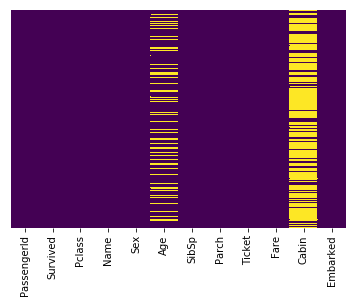

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


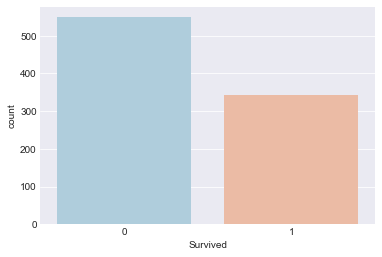

In [18]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


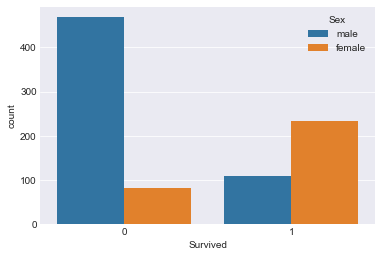

In [22]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=train,hue='Sex')

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


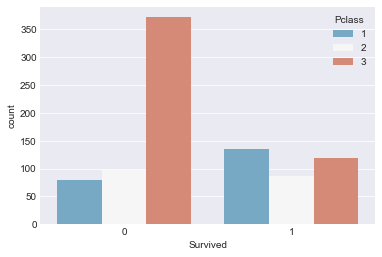

In [33]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data = train, hue = 'Pclass',palette='RdBu_r')

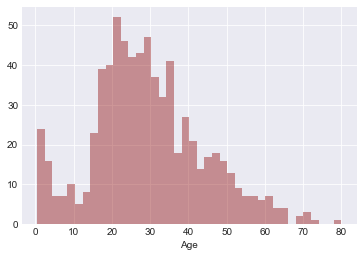

In [42]:
sns.distplot(train['Age'].dropna(),color = 'darkred',bins = 40,
            kde = False)

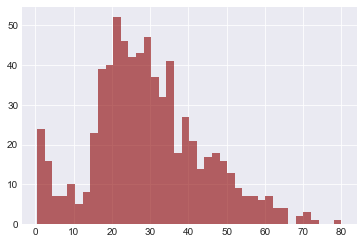

In [45]:
train['Age'].hist(bins = 40, color = 'darkred',alpha = 0.6,)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


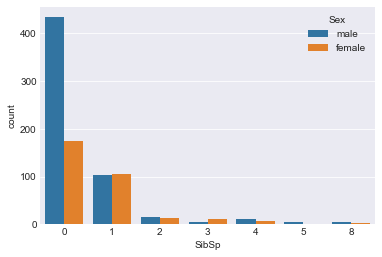

In [47]:
sns.countplot(x = 'SibSp',data = train, hue = 'Sex')

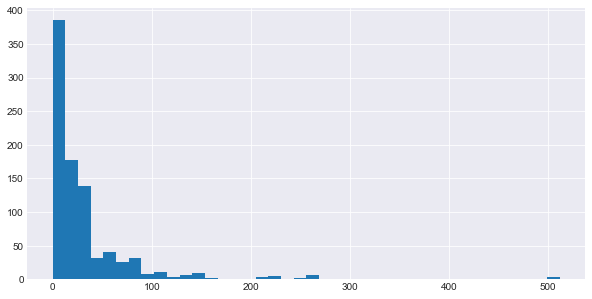

In [52]:
train['Fare'].hist(bins = 40,figsize= (10,5))

In [60]:
def imput_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [61]:
train['Age'] = train[['Age','Pclass']].apply(imput_age,axis = 1)

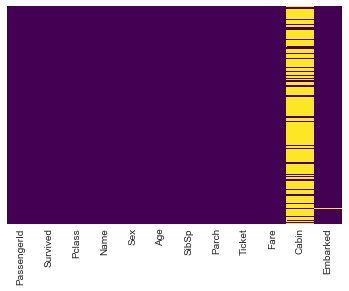

In [65]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [66]:
train.drop('Cabin',axis=1,inplace=True)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [69]:
train.dropna(inplace=True)

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [266]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [267]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN


In [268]:
train = pd.concat([train,sex,embark],axis=1)

In [277]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1


In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [271]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [272]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: could not convert string to float: 'B18'

In [89]:
predictions = logmodel.predict(X_test)

In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267



In [92]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
5,6,0,3,24.0,0,0,8.4583,1,1,0
6,7,0,1,54.0,0,0,51.8625,1,0,1
7,8,0,3,2.0,3,1,21.0750,1,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,1
9,10,1,2,14.0,1,0,30.0708,0,0,0


In [161]:
import re
df['Name'].head(15)
names = df['Name']

In [186]:
titles = []

In [187]:
pattern = re.compile(r"(\w+\.)")

for name in names:
    match = pattern.search(name)
    titles.append(match.group(1))

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


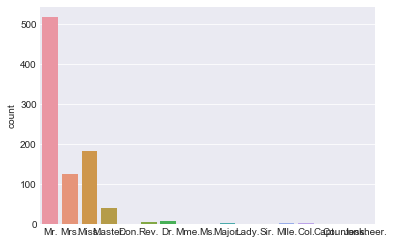

In [212]:
titles2 = pd.Series(titles)
sns.countplot(x=titles2)

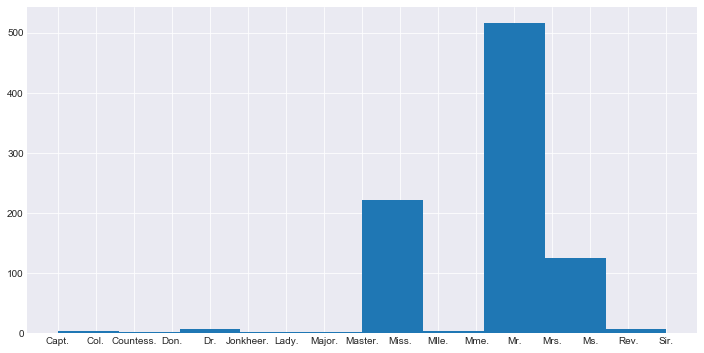

In [243]:
titles2.hist(figsize=(12,6),)


In [278]:
train = pd.concat([train,titles2],axis=1)

In [284]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,0
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1,Mr.
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0,Mrs.
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1,Miss.
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1,Mrs.
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1,Mr.
5,6,0,3,NaN,0,0,8.4583,NaN,1,1,0,Mr.
6,7,0,1,54.0,0,0,51.8625,E46,1,0,1,Mr.
7,8,0,3,2.0,3,1,21.0750,NaN,1,0,1,Master.
8,9,1,3,27.0,0,2,11.1333,NaN,0,0,1,Mrs.
9,10,1,2,14.0,1,0,30.0708,NaN,0,0,0,Mrs.
